In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# a) Data loading and pre-processing:
# Load the dataset into memory with the 'ISO-8859-1' encoding
dataset_path = "Corona_NLP_train.csv"
df = pd.read_csv(dataset_path, encoding='ISO-8859-1')

# Extract and concatenate all of the tweets from the OriginalTweet column
all_tweets = df["OriginalTweet"].str.cat(sep='')

# delete after testing:
# all_tweets = "I #%ˆ&Love Probabilities!!!"
# all_tweets = "I #%^&Love Probabilities!!!"

# Remove special characters except spaces and convert to lowercase
lower_tweets = all_tweets.lower()

tweets = ""
# Iterate through each character in the string
for char in lower_tweets:
    if char.isalnum():
        tweets += char
    elif char.isspace():
        tweets += '_'

# Print the first 3000 characters of the 'tweets' string
print(tweets[:3000])

menyrbie_philgahan_chrisitv_httpstcoifz9fan2pa_and_httpstcoxx6ghgfzcc_and_httpstcoi2nlzdxno8advice_talk_to_your_neighbours_family_to_exchange_phone_numbers_create_contact_list_with_phone_numbers_of_neighbours_schools_employer_chemist_gp_set_up_online_shopping_accounts_if_poss_adequate_supplies_of_regular_meds_but_not_over_ordercoronavirus_australia_woolworths_to_give_elderly_disabled_dedicated_shopping_hours_amid_covid19_outbreak_httpstcobinca9vp8pmy_food_stock_is_not_the_only_one_which_is_empty______please_dont_panic_there_will_be_enough_food_for_everyone_if_you_do_not_take_more_than_you_need____stay_calm_stay_safe______covid19france_covid19_covid19_coronavirus_confinement_confinementotal_confinementgeneral_httpstcozrlg0z520jme_ready_to_go_at_supermarket_during_the_covid19_outbreak______not_because_im_paranoid_but_because_my_food_stock_is_litteraly_empty_the_coronavirus_is_a_serious_thing_but_please_dont_panic_it_causes_shortage______coronavirusfrance_restezchezvous_stayathome_confine

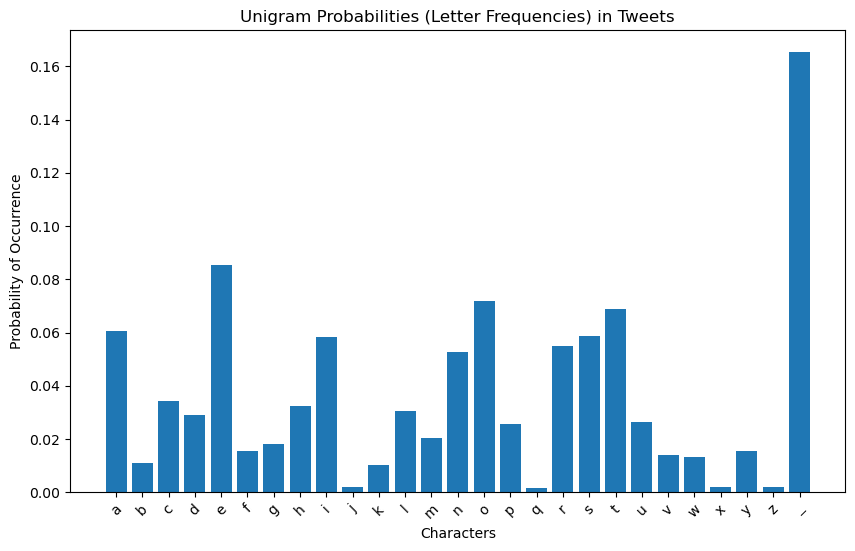

Character with the highest probability: _ (P = 0.16531662757375556)
Character with the lowest probability: q (P = 0.001626648528889578)


In [3]:
# b) Unigram probabilities

# Define alphabet A
A = 'abcdefghijklmnopqrstuvwxyz_'

# Initialize dictionary to store character counts
character_counts = {char: 0 for char in A}

# Count occurrences of character in "tweets" string
for char in tweets:
    if char in character_counts:
        character_counts[char] += 1

# Calculate the total number of characters in the "tweets" string
total_characters = len(tweets)

# Calculate the probabilities (frequencies) of each character
character_probabilities = {char: count / total_characters for char, count in character_counts.items()}

# Visualize the frequencies in a histogram
plt.figure(figsize=(10, 6))
plt.bar(character_probabilities.keys(), character_probabilities.values())
plt.xlabel("Characters")
plt.ylabel("Probability of Occurrence")
plt.title("Unigram Probabilities (Letter Frequencies) in Tweets")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

# Find characters with the highest and lowest probabilities
highest_prob_characters = max(character_probabilities, key=character_probabilities.get)
lowest_prob_characters = min(character_probabilities, key=character_probabilities.get)

print(f"Character with the highest probability: {highest_prob_characters} (P = {character_probabilities[highest_prob_characters]})")
print(f"Character with the lowest probability: {lowest_prob_characters} (P = {character_probabilities[lowest_prob_characters]})")

In [4]:
# The rarest characters 'q': 0.001626648528889578, 'x': 0.0021075163415036685, 'z': 0.0020506274037139097, 'j': 0.00211014198 are not really surprising, since these characters are the least used letters in the english language.
# The most frequently used character '_' is also not surprising since its used between every pair of words and sometimes many whitespaces are used in a row.

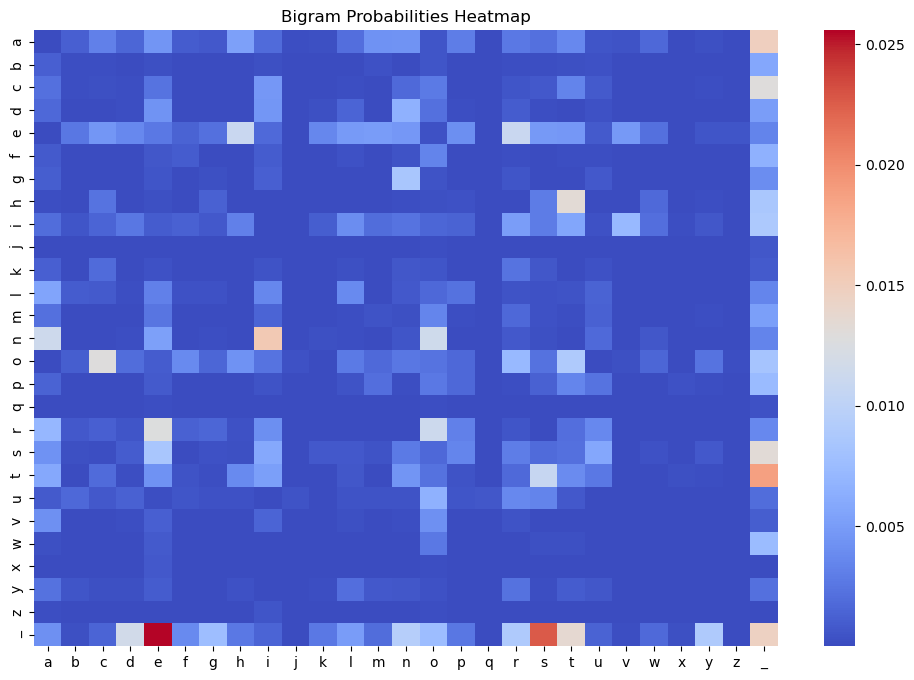

In [5]:
# c) Bigram probabilities
# Initialize a dictionary to store the counts of each ordered pair (x, y)
bigram_counts = {(x, y): 0 for x in A for y in A}

# Count the occurrences of each ordered pair (x, y) in the "tweets" string
for i in range(len(tweets) - 1):
    x, y = tweets[i], tweets[i + 1]
    if (x, y) in bigram_counts:
        bigram_counts[(x, y)] += 1

# Calculate the total number of ordered pairs in the "tweets" string
total_ordered_pairs = len(tweets) - 1

# Calculate the probabilities (frequencies) of each ordered pair (x, y)
bigram_probabilities = {(x, y): count / total_ordered_pairs for (x, y), count in bigram_counts.items()}

# Create a matrix of probabilities for the heatmap
prob_matrix = [[bigram_probabilities[(x, y)] for x in A] for y in A]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(prob_matrix, xticklabels=list(A), yticklabels=list(A), cmap="coolwarm")
plt.title("Bigram Probabilities Heatmap")

plt.show()

In [6]:
# Find the 10 most frequent ordered pairs (bigrams)
most_frequent_pairs = sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]

# Find the 10 least common ordered pairs (bigrams)
least_common_pairs = sorted(bigram_probabilities.items(), key=lambda x: x[1])[:10]

print("10 Most Frequent Ordered Pairs:")
for pair, probability in most_frequent_pairs:
    print(f"{pair}: P = {probability}")

print("\n10 Least Common Ordered Pairs:")
for pair, probability in least_common_pairs:
    print(f"{pair}: P = {probability}")

10 Most Frequent Ordered Pairs:
('e', '_'): P = 0.0255708930651626
('s', '_'): P = 0.022623420565966234
('_', 't'): P = 0.018747470473699866
('i', 'n'): P = 0.015522179874341699
('_', 'a'): P = 0.014804378923383595
('_', '_'): P = 0.0146598434941365
('t', '_'): P = 0.013610711325613692
('t', 'h'): P = 0.013347396780635854
('_', 's'): P = 0.013237744902219156
('_', 'c'): P = 0.012918666688171938

10 Least Common Ordered Pairs:
('_', 'x'): P = 2.0755087590845706e-05
('f', 'z'): P = 2.638146675703882e-05
('g', 'z'): P = 2.6631528053314067e-05
('q', 'z'): P = 2.6756558701451693e-05
('b', 'x'): P = 2.7131650645864567e-05
('y', 'x'): P = 2.7256681294002193e-05
('g', 'q'): P = 2.750674259027744e-05
('w', 'q'): P = 2.7631773238415066e-05
('z', 'r'): P = 2.7756803886552692e-05
('p', 'z'): P = 2.7881834534690315e-05


In [7]:
# It should be noted that we now have 27x27 items and not only 27 items which makes exhaustive reasoning more difficult. As can be seen, there are many very rare pairs, some common ("white spots") pairs and very few really common pairs ("hot spots").
# The most frequent pairs are expeceted as the english language has many words that end with and "e" and as many plurals end on "s". The other pairs are also very common in the english language ('t', 'h'): ("the", "therapy", "path",...), ('i', 'n'), ('i', 'io'): ("intervention", "infection") 

# The Least Common pairs are are also expected. There are not many words start with "x", however there are very many character pairs that are rare in the english language, e.g.: ('q', 'q'), ('x','x) which aren't even in the bottom 10.
# Furthermore we observe that for very rare combinations we get the same frequencies.

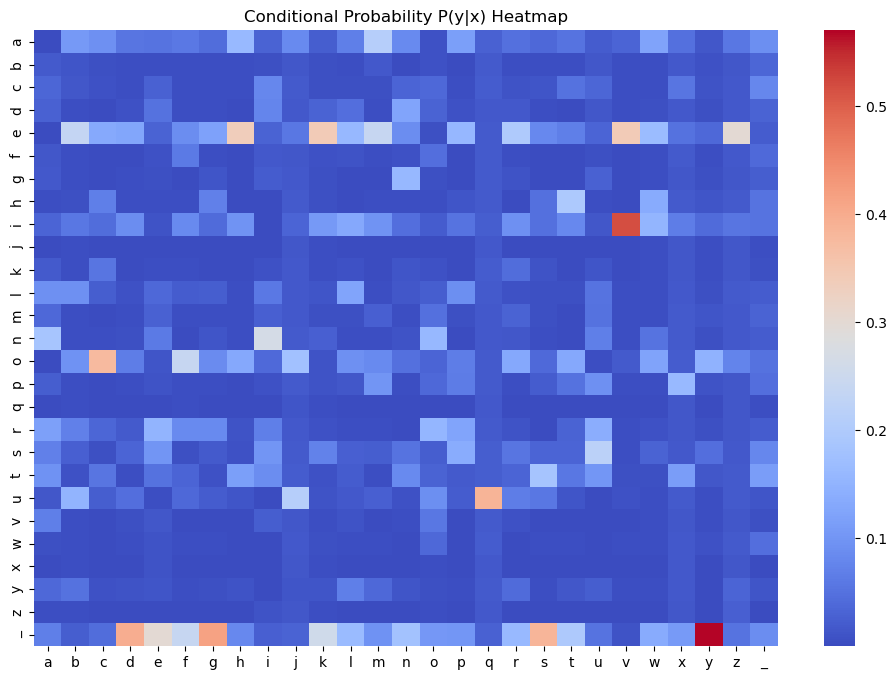

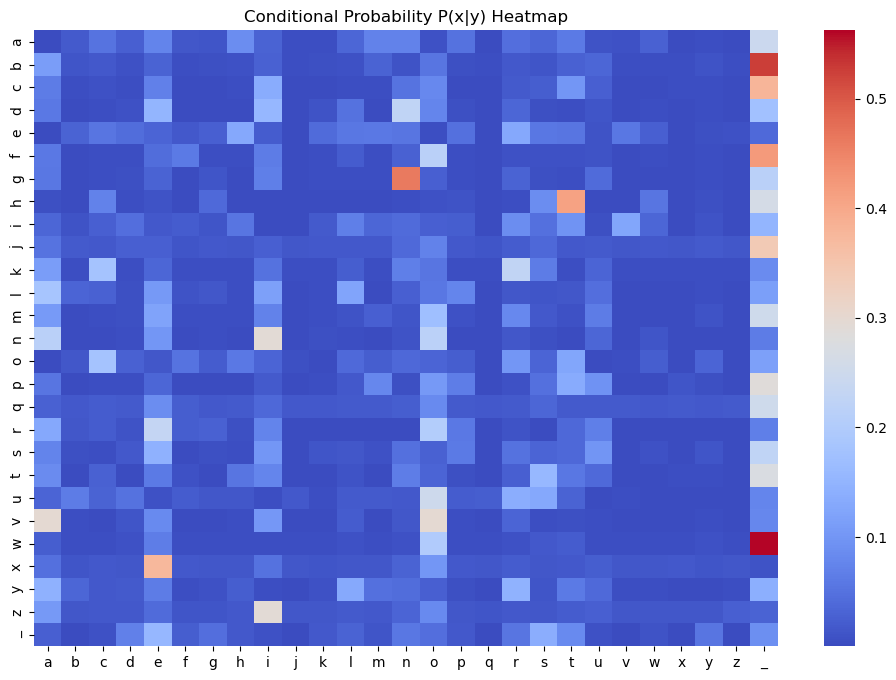

Highest P(x|y) for y=w: 0.5625260873623208
Lowest P(x|y) for y=_: 0.0002813473864656806
Highest P(y|x) for x=y: 0.5703925797843673
Lowest P(y|x) for x=_: 0.00012554748965941663


In [10]:
# d) Conditional probabilities
# Initialize dictionaries to store conditional probabilities P(y|x) and P(x|y)
conditional_prob_y_given_x = {x: {y: 0 for y in A} for x in A}
conditional_prob_x_given_y = {y: {x: 0 for x in A} for y in A}

# Calculate conditional probabilities P(y|x) and P(x|y)
 
for x in A:
    for y in A:
        if bigram_probabilities[(x, y)] > 0:
            conditional_prob_y_given_x[x][y] = bigram_probabilities[(x, y)] / character_probabilities[x]
            conditional_prob_x_given_y[y][x] = bigram_probabilities[(x, y)] / character_probabilities[y]
        else:
            conditional_prob_y_given_x[x][y] = 0
            conditional_prob_x_given_y[y][x] = 0  

# Create a heatmap for P(y|x)
plt.figure(figsize=(12, 8))
sns.heatmap([[conditional_prob_y_given_x[x][y] for x in A] for y in A], xticklabels=list(A), yticklabels=list(A), cmap="coolwarm")
plt.title("Conditional Probability P(y|x) Heatmap")

plt.show()

# Create a heatmap for P(x|y)
plt.figure(figsize=(12, 8))
sns.heatmap([[conditional_prob_x_given_y[y][x] for x in A] for y in A], xticklabels=list(A), yticklabels=list(A), cmap="coolwarm")
plt.title("Conditional Probability P(x|y) Heatmap")

plt.show()

# Find the highest and lowest probabilities in P(x|y) and P(y|x)
max_prob_x_given_y = max(conditional_prob_x_given_y, key=lambda x: max(conditional_prob_x_given_y[x].values()))
min_prob_x_given_y = min(conditional_prob_x_given_y, key=lambda x: min(conditional_prob_x_given_y[x].values()))
max_prob_y_given_x = max(conditional_prob_y_given_x, key=lambda x: max(conditional_prob_y_given_x[x].values()))
min_prob_y_given_x = min(conditional_prob_y_given_x, key=lambda x: min(conditional_prob_y_given_x[x].values()))

print(f"Highest P(x|y) for y={max_prob_x_given_y}: {max(conditional_prob_x_given_y[max_prob_x_given_y].values())}")
print(f"Lowest P(x|y) for y={min_prob_x_given_y}: {min(conditional_prob_x_given_y[min_prob_x_given_y].values())}")
print(f"Highest P(y|x) for x={max_prob_y_given_x}: {max(conditional_prob_y_given_x[max_prob_y_given_x].values())}")
print(f"Lowest P(y|x) for x={min_prob_y_given_x}: {min(conditional_prob_y_given_x[min_prob_y_given_x].values())}")


In [ ]:
In general, P(x|y) and P(y|x) are not the same. They are equal when x is equal to y, as shown on the diagonal of the heatmaps. While it is not impossible that in some specific instances, P(x|y) and P(y|x) with x unequal to y may be equal due to the nature of the data being discrete, it is improbable.